In [11]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [28]:
# read the dataset and extract the features and target separately
fifa = pd.read_csv('train.csv')
print(fifa.sample(n=20))

fifa.info()
fifa.describe()
fifa.columns

print(fifa['Nationality'].nunique())
print(fifa['Club'].nunique())
print(fifa['Position'].nunique())

fifa['Nationality_cat'] = fifa['Nationality'].astype('category').cat.codes
fifa['Club_cat'] = fifa['Club'].astype('category').cat.codes
fifa['Position_cat'] = fifa['Position'].astype('category').cat.codes


          Id           Name  Age          Nationality  Overall  Potential  \
14307  12268   C. Dickinson   30              England       63         63   
12057   4058       S. Filip   23              Romania       71         78   
7264   10639       E. Upson   27              England       65         66   
4600    3598     D. Andrade   26             Colombia       72         75   
13766   5758     A. Olanare   23              Nigeria       69         73   
12851  13103  D. Keita-Ruel   27              Germany       62         62   
12457   2085     J. Schunke   30            Argentina       74         74   
10829   6730      C. Duvall   25        United States       68         69   
3716   10386     C. Chaplin   20              England       65         82   
4232    1252     R. Yanbaev   33               Russia       76         76   
801    11225        P. Zulu   24         South Africa       64         67   
11038   7792      H. Olvera   27               Mexico       67         68   

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

[]

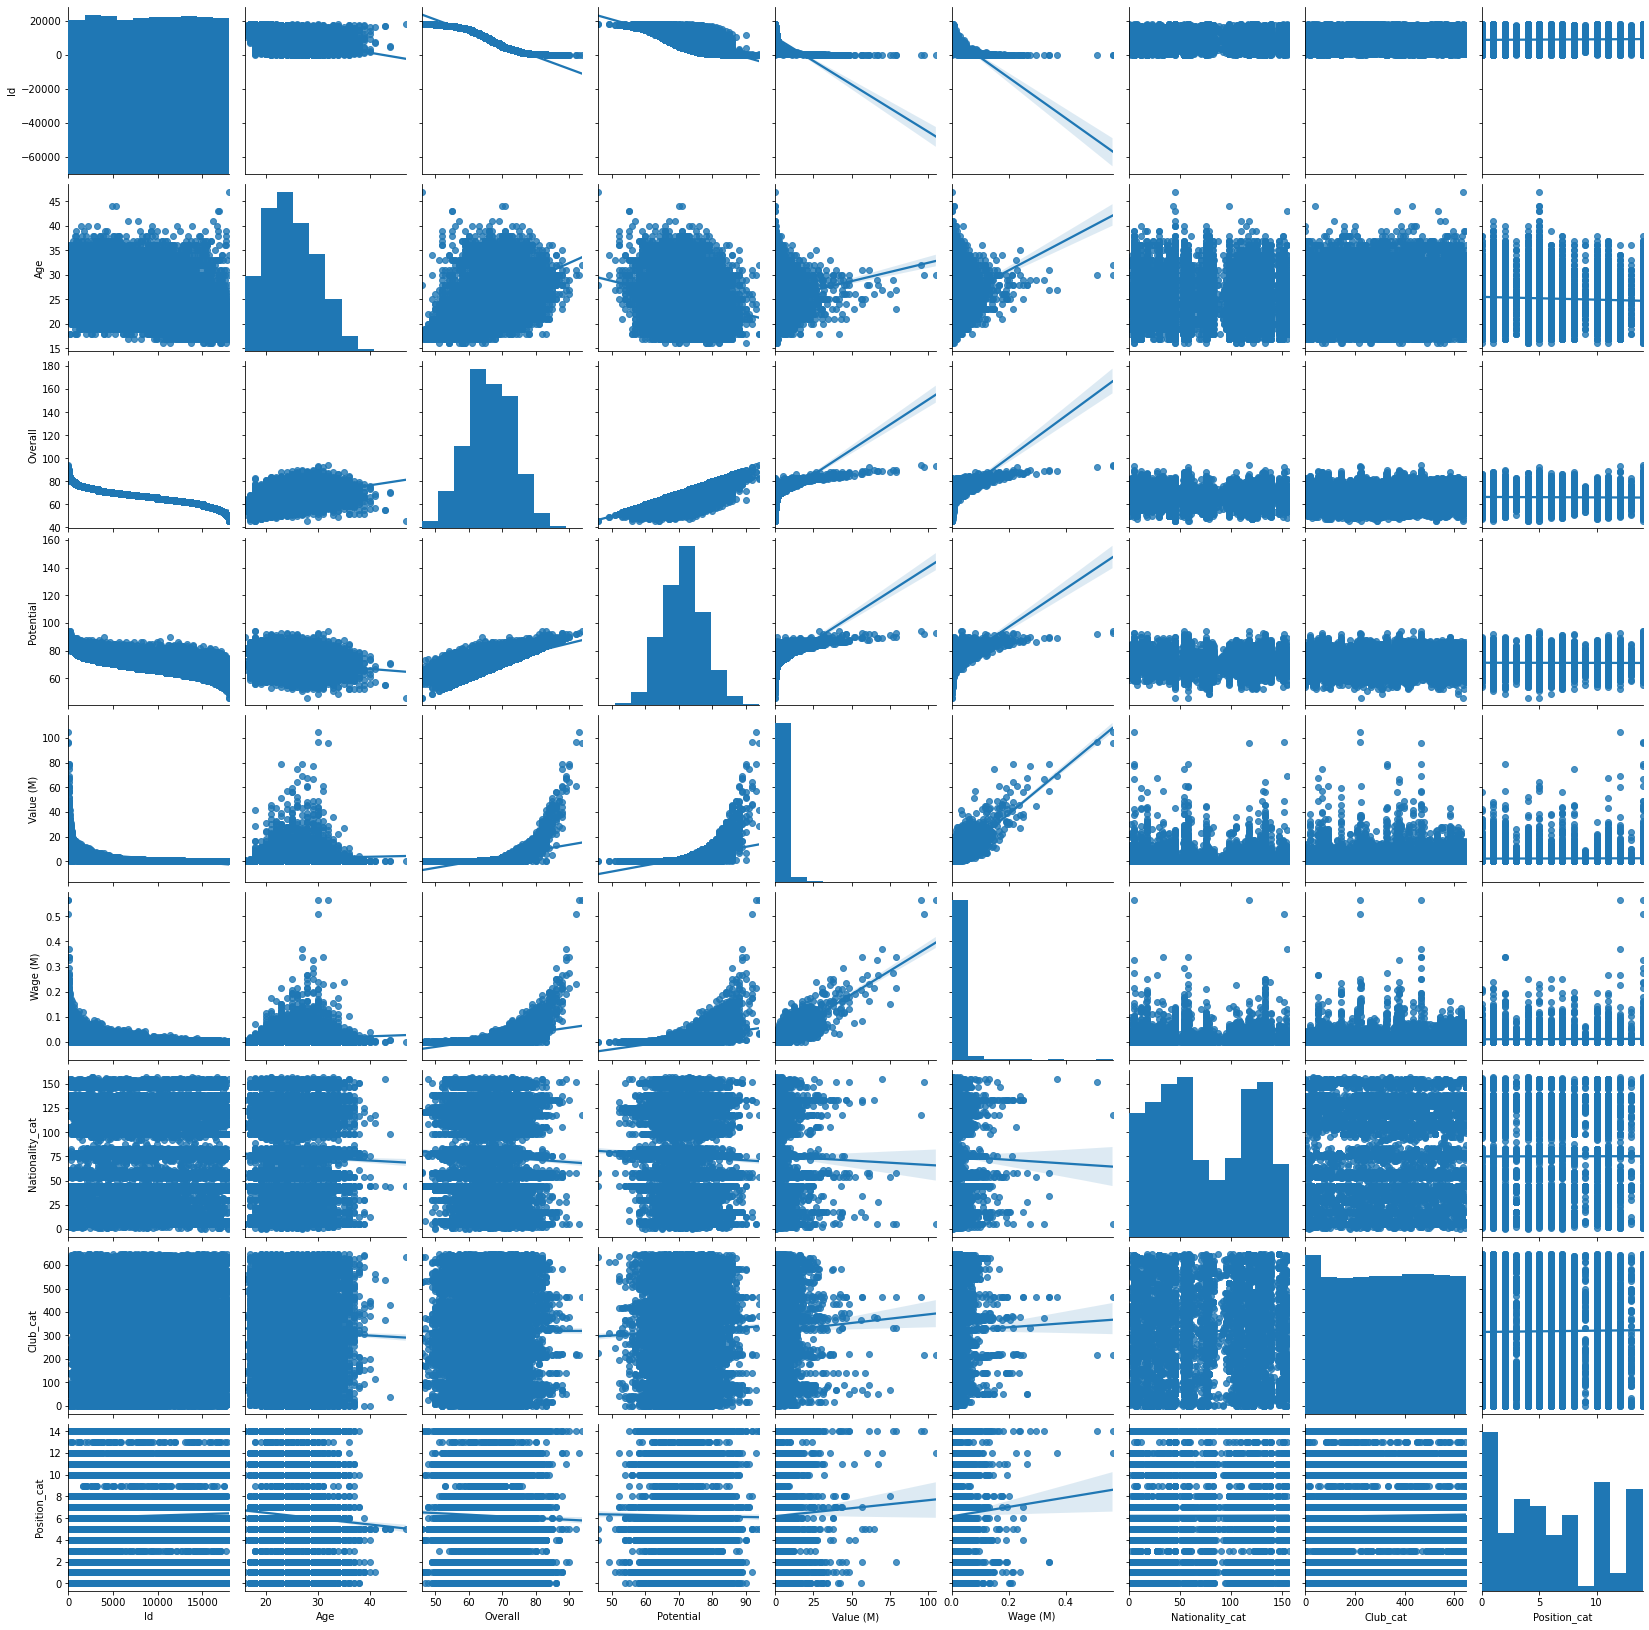

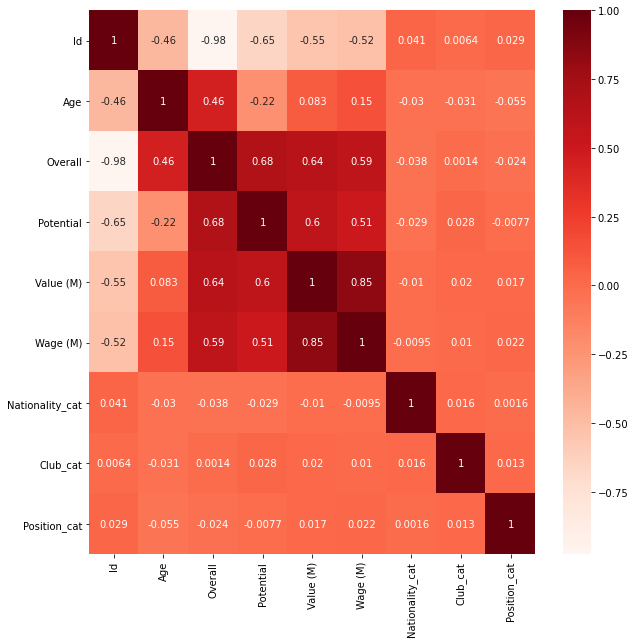

In [40]:
# Code Starts here
#sns.pairplot(fifa,corner=True,kind='reg')
sns.pairplot(fifa,kind='reg')

# Feature relation with Target
fifa_corr = fifa.corr()

plt.figure(figsize=(10,10))
sns.heatmap(fifa_corr,annot=True,cmap=plt.cm.Reds)
plt.plot()

# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



r2:  0.8601


[]

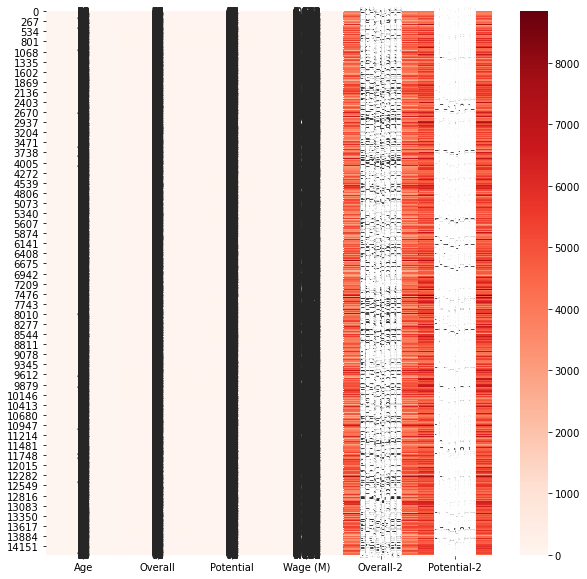

In [44]:
# Code Starts here

# Separate features and target
fifa['Overall-2'] = np.power(fifa['Overall'],2)
fifa['Potential-2'] = np.power(fifa['Potential'],2)

X = fifa[['Age','Overall', 'Potential', 'Wage (M)','Overall-2','Potential-2']]
y= fifa['Value (M)']


# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Fit the train data
basemodel = LinearRegression()
basemodel.fit(X_train,y_train)

# Predict
y_pred = basemodel.predict(X_test)

# R-squared score
r2=r2_score(y_test, y_pred)
print('r2: ', round(r2,4))

plt.figure(figsize=(10,10))
sns.heatmap(X,annot=True,cmap=plt.cm.Reds)
plt.plot()

# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [46]:
# Code starts here

#Load test data
test_data = pd.read_csv('test.csv')

# Store Id
results = pd.DataFrame(test_data['Id'])

# Separate features and target
test_data['Overall-2'] = np.power(test_data['Overall'],2)
test_data['Potential-2'] = np.power(test_data['Potential'],2)

test_data_features = test_data[['Age','Overall', 'Potential', 'Wage (M)','Overall-2','Potential-2']]

# Predict
test_data_pred = basemodel.predict(test_data_features)

# Add to results
results['Value (M)'] = test_data_pred.tolist()

# Write to CSV
results.to_csv('results.csv',index=False)

# Code ends here.